In [5]:
import numpy as np
#import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

tf.test.is_gpu_available()

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession, Session
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
session = Session(config=config)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

In [6]:
(x_train, y_train), (x_test,y_test)=cifar10.load_data()

In [7]:
import matplotlib.pyplot as plt

In [8]:
x_train.shape

(50000, 32, 32, 3)

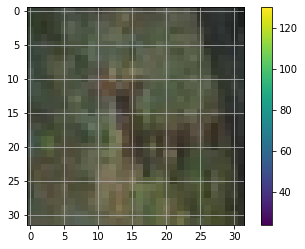

In [9]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid()
plt.show()

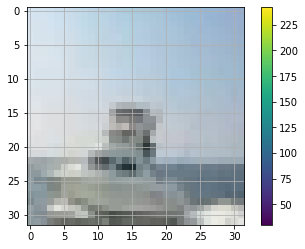

In [10]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid()
plt.show()

In [11]:
Num_classes=10

#normalize
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [12]:
#Converting interger label to one-hot encoding vector
y_train=to_categorical(y_train, Num_classes)
y_test=to_categorical(y_test, Num_classes)

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [13]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
#Creating model
input_layer=Input((32, 32, 3))

x=Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Conv2D(filters=64, kernel_size=3, strides=2,  padding='same')(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)

x=Flatten()(x)

x=Dense(128)(x)
x=BatchNormalization()(x)
x=LeakyReLU()(x)
x=Dropout(rate=0.5)(x)

x=Dense(Num_classes)(x)
output_layer=Activation('softmax')(x)
model=Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0     

In [15]:
opt=Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train
          , y_train
          , epochs=10
          )

Train on 50000 samples
Epoch 1/10
   32/50000 [..............................] - ETA: 1:38:19

InternalError:  Blas GEMM launch failed : a.shape=(32, 4096), b.shape=(4096, 128), m=32, n=128, k=4096
	 [[node model/dense/MatMul (defined at C:\conda\envs\tf_env\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_2597]

Function call stack:
distributed_function


In [ ]:
model.evaluate(x_test, y_test)